# Reproducing "Deep Bayesian Active Learning with Image Data"

Imports

In [ ]:
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

Constants

In [ ]:
T = 20
NUM_CLASSES = 10
EPOCHS = 50
INIT_TRAIN_SIZE = 20
VALID_SIZE = 100
BATCH_SIZE = 128
POOL_BATCH_SIZE = 128
SUBPOOL_SIZE = 10_000
ACQ_SIZE = 10
ACQ_STEPS = 100
REPS = 3
NUM_WORKERS = 2


Plot

In [ ]:
# data: list of {"data": [], "label": str, "color": str}
def plot_graph(data, std=False):
  x = [i*ACQ_SIZE for i in range(ACQ_STEPS+1)]

  for line in data:
    y = np.mean(line["data"], axis=0)
    plt.plot(x,y, label=line["label"], color=line["color"])
    if std:
      y_std = np.std(line["data"], axis=0)
      plt.fill_between(x, y - y_std, y + y_std, color=line["color"], alpha=0.2)

  plt.ylim(80.0, 100.0)

  plt.xticks(np.arange(0, 1100, 100))
  plt.yticks(np.arange(80.0, 102.0, 2.0))

  plt.legend(loc='lower right')
  plt.grid(linestyle='--')
  plt.show()

def print_table(data):
  x = [i*ACQ_SIZE for i in range(ACQ_STEPS+1)]
  hdrs = ["% err"]
  ten_row = ["10%"]
  five_row = ["5%"]

  for line in data:
    y = np.mean(line["data"], axis=0)
    i_ten = next(i for i, x in enumerate(y) if x >= 90.0)
    i_five = next(i for i, x in enumerate(y) if x >= 95.0)

    interp_ten = (90.0 - y[i_ten-1]) / (y[i_ten] - y[i_ten-1])
    res_ten = i_ten*ACQ_SIZE + round(interp_ten*ACQ_SIZE)

    interp_five = (95.0 - y[i_five-1]) / (y[i_five] - y[i_five-1])
    res_five = i_five*ACQ_SIZE + round(interp_five*ACQ_SIZE)

    hdrs.append(line["label"])
    ten_row.append(res_ten)
    five_row.append(res_five)

  print(tabulate([ten_row, five_row], headers=hdrs))



b_data = [[52.42, 59.52, 65.36, 70.09, 72.21, 75.21, 76.63, 75.47, 80.96, 80.79, 81.82, 75.12, 84.15, 85.85, 90.09, 89.34, 89.11, 91.5, 90.45, 90.62, 91.17, 91.31, 92.11, 92.34, 90.47, 92.82, 93.27, 92.09, 91.4, 92.87, 94.88, 94.37, 93.62, 95.21, 94.86, 94.48, 95.68, 94.76, 95.28, 95.78, 95.49, 96.07, 95.84, 96.05, 96.52, 96.48, 96.16, 95.94, 96.63, 96.18, 96.28, 96.75, 96.49, 96.44, 96.75, 96.58, 96.87, 96.52, 96.21, 96.58, 96.92, 97.0, 97.05, 96.6, 96.99, 96.86, 97.18, 96.96, 97.1, 97.69, 97.74, 96.92, 97.48, 97.27, 96.01, 96.71, 97.08, 97.65, 97.76, 97.59, 97.5, 97.58, 97.84, 97.98, 97.79, 98.08, 97.87, 97.87, 97.82, 97.85, 97.7, 98.26, 98.02, 97.98, 98.0, 98.06, 97.72, 98.14, 98.14, 97.94, 98.06], [52.33, 56.96, 62.75, 70.0, 73.63, 73.75, 77.45, 74.61, 73.98, 74.72, 80.99, 75.74, 81.78, 82.21, 84.31, 84.31, 83.62, 85.69, 87.48, 90.51, 90.11, 90.92, 91.39, 92.99, 91.94, 93.03, 93.55, 92.75, 93.51, 93.32, 93.87, 92.92, 94.56, 94.51, 94.74, 94.67, 95.04, 94.53, 94.96, 94.95, 95.81, 95.85, 95.99, 95.97, 95.91, 95.32, 95.93, 96.32, 96.12, 95.97, 96.2, 95.9, 96.53, 96.03, 96.72, 96.08, 96.74, 96.13, 96.82, 96.25, 97.11, 96.53, 96.71, 96.62, 97.06, 97.26, 96.96, 96.87, 97.11, 97.43, 97.34, 97.48, 97.5, 97.35, 97.39, 97.32, 97.36, 97.85, 97.4, 97.54, 97.8, 97.74, 97.72, 97.79, 97.7, 97.81, 97.74, 97.76, 97.48, 97.79, 97.86, 97.5, 97.93, 98.08, 98.0, 98.09, 98.07, 98.27, 98.23, 98.16, 97.93], [54.77, 59.22, 64.04, 66.98, 74.31, 76.34, 74.38, 76.65, 76.68, 78.09, 79.33, 77.38, 80.96, 82.95, 83.61, 82.54, 83.89, 84.29, 84.74, 85.59, 84.09, 83.93, 86.78, 87.53, 89.63, 89.98, 92.71, 91.72, 94.57, 93.64, 94.5, 94.55, 93.25, 94.9, 94.49, 95.01, 93.74, 94.87, 94.67, 92.34, 94.74, 95.15, 95.19, 95.82, 96.24, 96.21, 96.38, 95.7, 96.01, 96.08, 96.17, 96.76, 96.05, 96.34, 96.97, 96.74, 96.45, 97.0, 96.02, 97.15, 96.76, 97.24, 97.36, 97.31, 97.18, 97.43, 97.44, 97.36, 97.14, 96.77, 97.24, 97.1, 97.27, 97.22, 97.71, 96.91, 97.0, 97.5, 97.4, 97.18, 97.22, 97.74, 97.68, 97.68, 97.52, 97.87, 97.25, 97.61, 97.58, 97.75, 98.14, 97.92, 97.98, 98.03, 98.1, 97.84, 98.0, 98.02, 98.09, 98.4, 98.12]]
vr_data = [[54.86, 57.25, 60.01, 64.34, 71.14, 76.58, 80.78, 76.22, 80.57, 81.03, 82.27, 83.21, 84.46, 87.63, 88.52, 88.36, 88.94, 89.67, 89.61, 89.26, 90.87, 92.04, 93.08, 92.81, 91.01, 93.45, 93.26, 94.49, 94.63, 93.5, 94.66, 93.9, 94.9, 94.71, 95.22, 94.99, 95.99, 94.77, 96.41, 96.2, 95.88, 96.18, 96.3, 96.47, 96.52, 96.72, 96.64, 96.66, 96.67, 96.82, 96.33, 97.1, 96.64, 97.01, 96.61, 97.24, 96.92, 97.33, 97.34, 97.33, 97.42, 97.3, 96.98, 97.55, 97.39, 97.46, 97.43, 97.36, 97.59, 97.88, 97.83, 97.73, 97.49, 97.64, 97.84, 97.05, 97.81, 97.82, 98.04, 98.04, 98.19, 97.98, 97.9, 98.09, 97.95, 98.34, 98.36, 98.14, 97.75, 98.36, 98.21, 98.36, 98.31, 98.5, 98.22, 98.11, 98.33, 98.39, 98.04, 98.37, 98.34], [56.04, 60.85, 65.48, 75.96, 76.43, 80.56, 80.11, 82.23, 82.34, 86.1, 86.86, 84.52, 89.07, 88.63, 90.83, 90.87, 91.85, 90.08, 92.48, 92.74, 93.39, 94.34, 94.35, 93.17, 91.92, 95.12, 94.44, 94.76, 94.98, 95.62, 95.24, 95.78, 95.51, 95.47, 96.15, 96.53, 95.6, 95.69, 95.48, 96.41, 95.76, 96.63, 96.69, 96.61, 96.97, 96.78, 96.85, 96.58, 96.96, 96.75, 96.95, 96.72, 97.27, 97.16, 97.21, 97.21, 97.41, 97.5, 97.64, 97.44, 97.42, 97.45, 97.6, 97.36, 97.62, 97.74, 97.6, 97.84, 97.78, 97.68, 97.64, 97.89, 98.05, 97.58, 97.61, 97.7, 97.83, 97.88, 97.95, 97.92, 98.05, 97.91, 98.14, 98.05, 97.78, 98.0, 98.05, 98.23, 98.1, 98.04, 98.16, 98.0, 97.99, 98.06, 98.19, 98.33, 98.11, 97.97, 98.29, 98.25, 98.18], [53.7, 61.35, 64.77, 69.46, 71.26, 73.31, 75.51, 81.12, 82.54, 86.64, 85.69, 83.17, 87.52, 88.32, 90.4, 90.58, 89.96, 92.0, 91.38, 91.85, 93.12, 92.33, 93.85, 94.01, 93.46, 94.82, 94.56, 94.42, 93.91, 94.47, 94.27, 95.38, 93.99, 95.29, 95.41, 95.34, 96.24, 95.89, 96.83, 96.64, 96.87, 96.62, 96.88, 96.36, 96.45, 96.85, 96.4, 96.53, 96.38, 96.88, 96.48, 96.73, 96.61, 97.15, 96.8, 96.86, 97.0, 97.12, 97.18, 97.23, 97.32, 97.59, 97.17, 96.7, 97.59, 97.71, 97.47, 97.65, 97.58, 97.79, 97.61, 97.8, 97.64, 97.47, 97.75, 96.92, 97.71, 97.76, 97.99, 97.92, 97.75, 97.72, 97.69, 97.58, 98.07, 97.93, 98.02, 98.03, 98.09, 97.96, 98.08, 97.99, 97.89, 98.08, 98.1, 98.16, 97.88, 98.03, 98.32, 98.13, 98.09]]
r_data = [[55.58, 52.5, 62.43, 66.33, 72.94, 75.12, 77.87, 77.23, 78.71, 80.35, 81.22, 80.2, 84.2, 86.74, 87.53, 89.57, 90.76, 91.25, 89.18, 90.59, 91.76, 91.91, 88.97, 91.05, 91.49, 92.58, 93.02, 92.84, 94.74, 94.66, 95.36, 93.95, 94.6, 94.33, 95.51, 95.11, 94.57, 94.55, 95.47, 95.41, 95.06, 95.18, 95.53, 95.78, 96.11, 95.7, 96.58, 96.39, 96.21, 96.23, 96.21, 96.04, 96.11, 96.97, 96.63, 96.76, 96.58, 97.23, 97.3, 96.89, 96.78, 97.47, 96.9, 97.22, 97.11, 96.92, 97.57, 97.53, 97.61, 97.22, 96.82, 97.4, 97.55, 97.42, 97.62, 97.48, 97.91, 97.86, 97.33, 97.98, 97.83, 97.64, 97.54, 97.18, 97.7, 97.9, 97.8, 97.8, 97.42, 98.19, 98.08, 98.2, 98.37, 97.93, 98.11, 98.23, 98.03, 98.47, 98.11, 98.17, 98.2], [53.39, 60.67, 63.37, 63.98, 71.27, 70.91, 73.03, 75.21, 81.51, 83.51, 85.63, 82.84, 88.13, 89.47, 90.83, 90.69, 91.15, 92.28, 91.82, 92.33, 92.94, 91.91, 93.08, 94.36, 91.72, 92.35, 94.59, 94.08, 94.51, 94.83, 94.79, 93.91, 95.15, 95.38, 95.91, 96.24, 95.35, 94.93, 95.52, 96.15, 95.55, 95.3, 96.02, 96.47, 96.08, 96.78, 96.33, 96.74, 96.62, 96.47, 97.04, 96.42, 96.87, 97.4, 96.92, 96.95, 97.02, 96.76, 97.72, 97.57, 97.18, 97.27, 97.44, 97.29, 97.5, 97.73, 97.57, 97.85, 97.53, 97.05, 97.23, 97.65, 97.71, 97.99, 97.73, 97.43, 97.8, 97.31, 97.96, 97.54, 97.68, 98.04, 98.25, 98.24, 98.0, 97.97, 98.26, 98.14, 98.29, 98.0, 98.1, 97.99, 98.11, 98.46, 97.96, 98.26, 98.12, 98.18, 98.31, 98.3, 98.35], [53.73, 55.75, 61.04, 67.51, 74.1, 75.76, 78.68, 76.4, 78.28, 82.07, 80.09, 79.25, 84.02, 83.1, 85.15, 85.6, 86.81, 87.21, 88.42, 92.18, 91.98, 91.81, 93.12, 93.97, 92.15, 91.81, 92.43, 93.57, 93.85, 94.51, 94.52, 94.13, 94.27, 94.44, 95.02, 95.15, 94.97, 94.45, 95.17, 95.61, 95.69, 95.75, 95.72, 96.0, 96.05, 96.15, 96.49, 96.09, 96.69, 96.48, 96.02, 96.41, 96.68, 96.57, 96.68, 96.64, 96.87, 97.13, 96.96, 97.01, 97.28, 96.89, 97.03, 96.39, 97.1, 96.95, 97.57, 97.66, 97.53, 97.64, 97.63, 97.64, 97.29, 97.44, 97.66, 97.24, 97.98, 97.88, 98.14, 97.76, 98.01, 98.1, 98.06, 98.02, 98.08, 97.76, 97.84, 98.16, 98.13, 98.17, 97.82, 97.6, 97.92, 98.16, 98.22, 98.33, 98.38, 98.29, 98.26, 98.46, 98.43]]


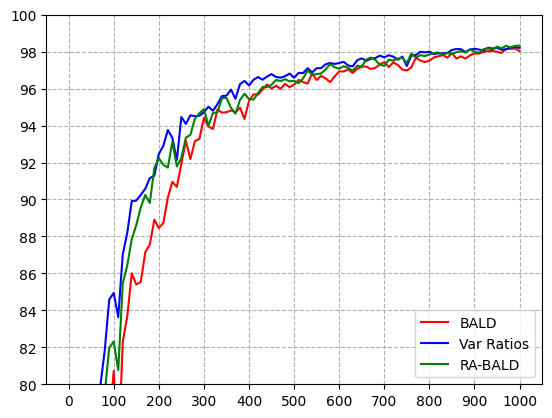

In [ ]:
data_dict = [
    {"data": b_data, "label": "BALD", "color": "red"},
    {"data": vr_data, "label": "Var Ratios", "color": "blue"},
    {"data": r_data, "label": "RA-BALD", "color": "green"},
]

plot_graph(data_dict, std=False)

In [ ]:
print_table(data_dict)

% err      BALD    Var Ratios    RA-BALD
-------  ------  ------------  ---------
10%         229           162        176
5%          406           319        344
